In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import LSTM
from sklearn.base import BaseEstimator, RegressorMixin
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Input, GRU, LSTM, Dense, Dropout, Concatenate, Reshape
from keras.optimizers import Adam
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv('train_Winterpolate_stn+ef_label.csv')
data.head()

,stn4contest,ef_datetime,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,vv,class_interval
0,0,2020-05-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,12,0.0,0
1,0,2020-05-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,15,0.0,0
2,0,2020-05-01 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,18,0.0,0
3,0,2020-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,21,0.0,0
4,0,2020-05-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,2,0,0.0,0


In [10]:
data_20 = data[data['year'] == 2020]
data_20.head()

,stn4contest,ef_datetime,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,vv,class_interval
0,0,2020-05-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,12,0.0,0
1,0,2020-05-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,15,0.0,0
2,0,2020-05-01 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,18,0.0,0
3,0,2020-05-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1,21,0.0,0
4,0,2020-05-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,2,0,0.0,0


<Figure size 1000x600 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaco

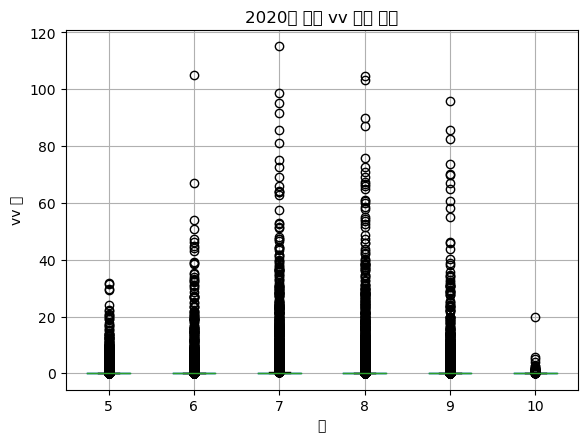

In [16]:
plt.figure(figsize=(10, 6))
data_20.boxplot(column='vv', by='month')
plt.title('2020년 월별 vv 값의 분포')
plt.xlabel('월')
plt.ylabel('vv 값')
plt.suptitle('')  # 상위 제목 제거
plt.show()

<Figure size 1000x600 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaco

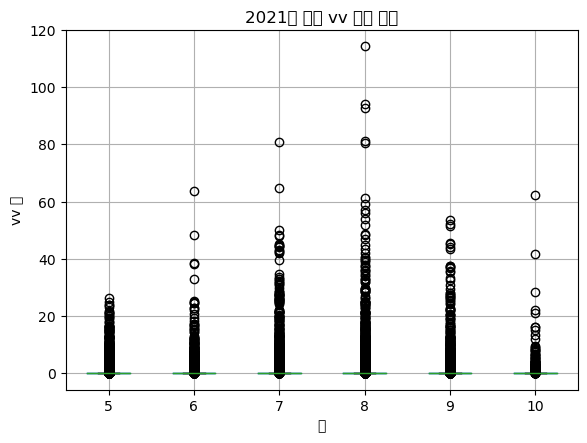

In [17]:
data_21 = data[data['year'] == 2021]
plt.figure(figsize=(10, 6))
data_21.boxplot(column='vv', by='month')
plt.title('2021년 월별 vv 값의 분포')
plt.xlabel('월')
plt.ylabel('vv 값')
plt.suptitle('')  # 상위 제목 제거
plt.show()

<Figure size 1000x600 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaco

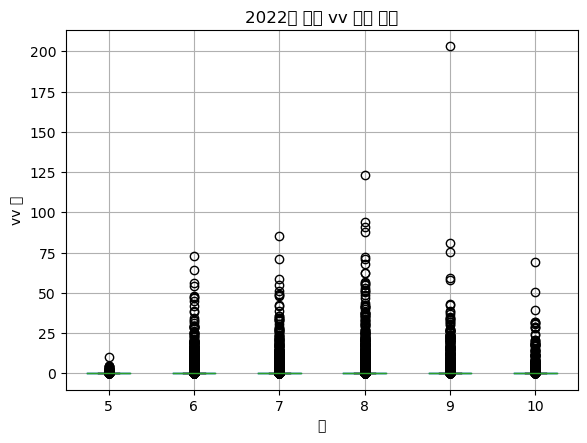

In [18]:
data_22 = data[data['year'] == 2022]
plt.figure(figsize=(10, 6))
data_22.boxplot(column='vv', by='month')
plt.title('2022년 월별 vv 값의 분포')
plt.xlabel('월')
plt.ylabel('vv 값')
plt.suptitle('')  # 상위 제목 제거
plt.show()

-----------

In [138]:
data = pd.read_csv('use_this.csv')
data.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0


In [89]:
weighted_df = data.copy()
weighted_df.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0


In [90]:
df_summer = weighted_df[(weighted_df['month']==7)|(weighted_df['month']==8)]
df_summer.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
484,0,83.406188,80.662336,72.736378,52.529449,17.903721,1.286581,0.301382,0.062268,0.016133,0.3,2,2020,7,1,0
485,0,75.886214,74.078753,67.692637,51.712346,19.156079,1.676909,0.458140,0.089279,0.023120,1.2,4,2020,7,1,3
486,0,64.206531,57.383076,39.307190,22.223283,8.718578,0.985142,0.255232,0.065942,0.040548,0.1,1,2020,7,1,6
487,0,38.413036,30.628557,22.019073,14.661229,6.802186,1.431956,0.263271,0.074039,0.045513,0.0,0,2020,7,1,9
488,0,52.835873,34.887667,16.531653,5.110363,0.977638,0.258792,0.055336,0.007204,0.000000,0.0,0,2020,7,1,12


In [91]:
df_nonsummer = weighted_df[(weighted_df['month']!=7)&(weighted_df['month']!=8)]
df_nonsummer.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0


In [92]:
from pycaret.regression import *  

# 회귀 모델 설정
regression_setup_summer = setup(
    data=df_summer.drop(columns=['class_interval']), 
    target='vv',  # 목표 변수 설정
    numeric_features=['v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09'],  # 수치형 특징 설정
    categorical_features=['stn4contest', 'year', 'month', 'day', 'hour'],  # 범주형 특징 설정
    session_id=123,  # 재현성을 위한 세션 ID 설정
    use_gpu=True,  # GPU 사용
    fold_strategy='kfold',  # K-Fold 교차 검증 사용
    fold=10,  # Fold 수 설정
    verbose=False  # 출력을 최소화
)  

In [93]:
# LightGBM 모델 생성
model_summer = create_model('lightgbm')

# 모델 튜닝
tuned_model_summer = tune_model(model_summer, n_iter=5)

# 튜닝된 모델 확인
print(tuned_model_summer)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3012,19.9075,4.4618,0.2701,0.5669,3.2087
1,1.1851,16.5040,4.0625,0.4562,0.5466,3.0880
2,1.1992,17.6924,4.2062,0.3272,0.5491,3.2346
3,1.3257,25.3945,5.0393,0.3382,0.5469,2.8492
4,1.2390,20.6458,4.5438,0.2195,0.5512,3.7313
5,1.1994,18.3940,4.2888,0.3913,0.5317,2.6729
6,1.2809,20.0336,4.4759,0.3086,0.5566,2.9839
7,1.3974,27.3075,5.2257,0.2750,0.5653,3.1616
8,1.5033,29.9499,5.4727,0.3209,0.5617,3.8628


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2962,19.2414,4.3865,0.2945,0.5690,3.5825
1,1.2432,17.6807,4.2048,0.4174,0.5510,3.2398
2,1.2372,17.9234,4.2336,0.3185,0.5552,3.2878
3,1.3307,25.8550,5.0848,0.3262,0.5457,3.0913
4,1.2490,19.8244,4.4525,0.2506,0.5545,3.7888
5,1.2484,20.5712,4.5355,0.3192,0.5418,3.1553
6,1.2570,18.7024,4.3246,0.3546,0.5562,2.7124
7,1.3954,27.6484,5.2582,0.2659,0.5714,3.5373
8,1.4446,29.3211,5.4149,0.3351,0.5590,3.6977


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LGBMRegressor(random_state=123)


In [94]:
save_model(tuned_model_summer, 'tuned_model_summer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['v01', 'v02', 'v03', 'v04', 'v05',
                                              'v06', 'v07', 'v08', 'v09'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['stn4contest', 'year', 'month',
                                              'day', 'hour'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Tra...
                 ('onehot_encoding',
                  TransformerWrapper(include=['stn4contest', 'year', 'hour'],
                                     transformer=OneHotEncoder(cols=['stn4contest',
                                                                     'year',
                                                                     'hour'],
       

In [99]:
# 회귀 모델 설정
regression_setup_nonsummer = setup(
    data=df_nonsummer.drop(columns=['class_interval']), 
    target='vv',  # 목표 변수 설정
    numeric_features=['v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09'],  # 수치형 특징 설정
    categorical_features=['stn4contest', 'year', 'month', 'day', 'hour'],  # 범주형 특징 설정
    session_id=123,  # 재현성을 위한 세션 ID 설정
    use_gpu=True,  # GPU 사용
    fold_strategy='kfold',  # K-Fold 교차 검증 사용
    fold=10,  # Fold 수 설정
    verbose=False  # 출력을 최소화
)  

In [100]:
# LightGBM 모델 생성
model_nonsummer = create_model('lightgbm')

# 모델 튜닝
tuned_model_nonsummer = tune_model(model_nonsummer, n_iter=5)

# 튜닝된 모델 확인
print(tuned_model_nonsummer)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4823,4.7081,2.1698,0.5620,0.3225,1.7941
1,0.4989,5.5363,2.3529,0.5661,0.3287,2.2783
2,0.4979,4.5893,2.1423,0.6477,0.3416,2.6801
3,0.4888,3.8419,1.9601,0.5935,0.3356,1.9945
4,0.4949,5.1945,2.2791,0.4297,0.3404,1.8141
5,0.4793,5.5949,2.3654,0.3536,0.3202,2.0131
6,0.4774,4.5351,2.1296,0.5637,0.3240,1.8219
7,0.5139,11.6074,3.4070,0.3912,0.3306,2.3282
8,0.4524,4.7594,2.1816,0.6293,0.3076,2.3483


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5642,5.5449,2.3548,0.4842,0.3616,2.2688
1,0.5545,6.2257,2.4951,0.5121,0.3576,2.6673
2,0.5678,5.5675,2.3596,0.5727,0.3813,2.5032
3,0.5464,4.1631,2.0404,0.5595,0.3618,2.1939
4,0.5572,5.2046,2.2814,0.4286,0.3782,2.1224
5,0.5420,5.5751,2.3612,0.3559,0.3588,2.3625
6,0.5339,5.0075,2.2378,0.5183,0.3691,2.1500
7,0.5493,11.7593,3.4292,0.3832,0.3556,2.3981
8,0.5410,5.5968,2.3658,0.5641,0.3511,3.6993


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LGBMRegressor(random_state=123)


In [101]:
save_model(tuned_model_nonsummer, 'tuned_model_nonsummer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['v01', 'v02', 'v03', 'v04', 'v05',
                                              'v06', 'v07', 'v08', 'v09'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['stn4contest', 'year', 'month',
                                              'day', 'hour'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['stn4contest', 'year', 'month',
                                              'hour'],
                                     transformer=OneHotEncoder(cols=['stn4contest',
                                                                     'year',
                                                                     'month',
               

-----

In [95]:
def classify_class(rainfall):
    if rainfall < 0.1:
        return 0
    elif 0.1 <= rainfall < 0.2:
        return 1
    elif 0.2 <= rainfall < 0.5:
        return 2
    elif 0.5 <= rainfall < 1.0:
        return 3
    elif 1.0 <= rainfall < 2.0:
        return 4
    elif 2.0 <= rainfall < 5.0:
        return 5
    elif 5.0 <= rainfall < 10.0:
        return 6
    elif 10.0 <= rainfall < 20.0:
        return 7
    elif 20.0 <= rainfall < 30.0:
        return 8
    else:
        return 9


In [96]:
test = pd.read_csv('test_stn+ef_label.csv')
submit = pd.read_csv('rainfall_test.csv')

test_summer = test[(test['month']==7)|(test['month']==8)]
test_summer_df = test_summer.drop(columns=['ef_datetime'])

test_nonsummer = test[(test['month']!=7)&(test['month']!=8)]
test_nonsummer_df = test_nonsummer.drop(columns=['ef_datetime'])

In [97]:
test_summer_df

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,class_interval
484,31,6.503124,5.462832,4.150677,3.067759,2.183605,1.208193,0.438101,0.163602,0.055104,2023,7,1,0,NaN
485,31,9.167768,7.596527,5.805892,4.598544,3.223773,1.736330,0.738495,0.093538,0.033665,2023,7,1,3,NaN
486,31,11.686011,9.529133,7.077700,5.320143,4.115039,2.440809,1.287978,0.417684,0.137496,2023,7,1,6,NaN
487,31,14.335506,11.319273,7.963066,5.708536,4.290680,2.563479,1.212575,0.314723,0.037060,2023,7,1,9,NaN
488,31,8.806896,6.885748,4.481727,2.780753,1.868657,0.972671,0.538073,0.086247,0.014993,2023,7,1,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,35,61.674173,55.245616,47.332825,39.087061,31.558324,19.488930,7.783541,0.968411,0.235208,2023,8,31,9,NaN
6176,35,75.809379,70.161566,55.684503,41.630423,29.018997,14.226963,4.780910,0.348110,0.126211,2023,8,31,12,NaN
6177,35,62.433869,56.011527,40.564006,30.611016,22.118788,11.224320,3.086443,0.458168,0.285489,2023,8,31,15,NaN
6178,35,44.564003,37.192567,27.661053,21.447524,15.424590,8.025605,3.579084,0.595937,0.167917,2023,8,31,18,NaN


In [98]:
prediction_test_summer = predict_model(tuned_model_summer, data=test_summer_df)

prediction_test_summer

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,class_interval,prediction_label
484,31,6.503124,5.462832,4.150677,3.067759,2.183605,1.208193,0.438101,0.163602,0.055104,2023,7,1,0,NaN,0.040813
485,31,9.167768,7.596527,5.805892,4.598544,3.223773,1.736330,0.738495,0.093538,0.033665,2023,7,1,3,NaN,0.044045
486,31,11.686010,9.529133,7.077700,5.320143,4.115038,2.440809,1.287978,0.417684,0.137496,2023,7,1,6,NaN,0.044045
487,31,14.335506,11.319273,7.963066,5.708536,4.290679,2.563479,1.212575,0.314723,0.037060,2023,7,1,9,NaN,0.044045
488,31,8.806896,6.885748,4.481728,2.780753,1.868657,0.972671,0.538073,0.086247,0.014993,2023,7,1,12,NaN,0.001558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,35,61.674171,55.245617,47.332825,39.087063,31.558323,19.488930,7.783541,0.968411,0.235208,2023,8,31,9,NaN,2.163492
6176,35,75.809380,70.161568,55.684502,41.630424,29.018997,14.226963,4.780910,0.348110,0.126211,2023,8,31,12,NaN,1.087398
6177,35,62.433868,56.011528,40.564007,30.611015,22.118788,11.224320,3.086443,0.458168,0.285489,2023,8,31,15,NaN,2.332403
6178,35,44.564003,37.192566,27.661053,21.447525,15.424590,8.025604,3.579084,0.595937,0.167917,2023,8,31,18,NaN,0.150051


In [102]:
prediction_test_nonsummer = predict_model(tuned_model_nonsummer, data=test_nonsummer_df)
prediction_test_nonsummer

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,class_interval,prediction_label
0,31,68.000000,46.000000,13.0,1.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,12,NaN,0.060127
1,31,83.000000,66.000000,26.0,5.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,15,NaN,0.190312
2,31,17.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,18,NaN,0.033321
3,31,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,21,NaN,0.018529
4,31,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,5,2,0,NaN,0.018529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,35,4.974359,4.974359,4.0,2.0,2.0,0.0,0.0,0.0,0.0,2023,10,10,9,NaN,0.056384
6496,35,8.000000,6.000000,6.0,5.0,0.0,0.0,0.0,0.0,0.0,2023,10,10,12,NaN,0.056862
6497,35,8.000000,6.000000,6.0,5.0,0.0,0.0,0.0,0.0,0.0,2023,10,10,15,NaN,0.050908
6498,35,10.000000,8.000000,8.0,8.0,6.0,2.0,0.0,0.0,0.0,2023,10,10,18,NaN,0.056862


In [104]:
idx999_summer = prediction_test_summer[prediction_test_summer['class_interval'].notnull()].index
idx999_nonsummer = prediction_test_nonsummer[prediction_test_nonsummer['class_interval'].notnull()].index

print(idx999_summer)
print(idx999_nonsummer)

Index([2024, 2092, 2093, 5881], dtype='int64')
Index([44, 1198, 3971], dtype='int64')


In [105]:
prediction_test_summer['class_interval'] = prediction_test_summer['prediction_label'].apply(classify_class)
prediction_test_summer.loc[idx999_summer, 'class_interval'] = -999

prediction_test_nonsummer['class_interval'] = prediction_test_nonsummer['prediction_label'].apply(classify_class)
prediction_test_nonsummer.loc[idx999_nonsummer, 'class_interval'] = -999

In [129]:
submit=pd.read_csv("rainfall_test2.csv")
#제출용 데이터
realsubmit=pd.read_csv("rainfall_test.csv")


In [131]:
prediction_test_summer['ef_datetime'] = pd.to_datetime(prediction_test_summer[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H')
prediction_test_nonsummer['ef_datetime'] = pd.to_datetime(prediction_test_nonsummer[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H')
prediction_test_summer.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,class_interval,prediction_label,ef_datetime
484,31,6.503124,5.462832,4.150677,3.067759,2.183605,1.208193,0.438101,0.163602,0.055104,2023,7,1,0,0,0.040813,2023-07-01 00:00:00
485,31,9.167768,7.596527,5.805892,4.598544,3.223773,1.736330,0.738495,0.093538,0.033665,2023,7,1,3,0,0.044045,2023-07-01 03:00:00
486,31,11.686010,9.529133,7.077700,5.320143,4.115038,2.440809,1.287978,0.417684,0.137496,2023,7,1,6,0,0.044045,2023-07-01 06:00:00
487,31,14.335506,11.319273,7.963066,5.708536,4.290679,2.563479,1.212575,0.314723,0.037060,2023,7,1,9,0,0.044045,2023-07-01 09:00:00
488,31,8.806896,6.885748,4.481728,2.780753,1.868657,0.972671,0.538073,0.086247,0.014993,2023,7,1,12,0,0.001558,2023-07-01 12:00:00


In [133]:
prediction_test = pd.concat([prediction_test_summer, prediction_test_nonsummer]).sort_index()
prediction_test.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,year,month,day,hour,class_interval,prediction_label,ef_datetime
0,31,68.0,46.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,12,0,0.060127,2023-05-01 12:00:00
1,31,83.0,66.0,26.0,5.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,15,1,0.190312,2023-05-01 15:00:00
2,31,17.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,18,0,0.033321,2023-05-01 18:00:00
3,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,5,1,21,0,0.018529,2023-05-01 21:00:00
4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,5,2,0,0,0.018529,2023-05-02 00:00:00


In [134]:
#submit-prediction 지점,date 맞추기
prediction_test['ef_datetime'] = pd.to_datetime(prediction_test['ef_datetime'])

submit['ef_year_temp'] = submit['ef_year'].replace({'D': '2023'})
submit['ef_datetime'] = pd.to_datetime(submit[['ef_year_temp', 'ef_month', 'ef_day', 'ef_hour']].astype(str).agg('-'.join, axis=1), 
                                       format='%Y-%m-%d-%H')
stn_mapping = {'STN031': 31, 'STN032': 32, 'STN033': 33, 'STN034': 34, 'STN035': 35}
submit['stn4contest'] = submit['stn4contest'].replace(stn_mapping)


In [135]:
#prediction의 class_interval submit에 흩뿌리기
# prediction_test=new_data.copy() #new_data : 개개인마다 달라유
merged = submit.merge(prediction_test[['ef_datetime', 'stn4contest', 'class_interval']], 
                      on=['ef_datetime', 'stn4contest'], 
                      how='left', 
                      suffixes=('', '_pred'))
merged['class_interval_pred']


0         0
1         1
2         0
3         0
4         0
         ..
121995    0
121996    0
121997    0
121998    0
121999    0
Name: class_interval_pred, Length: 122000, dtype: int64

In [136]:
#-999 index 저장
idx999 = realsubmit[realsubmit['rainfall_test.class_interval'].notnull()].index
merged.loc[idx999, 'class_interval_pred'] = -999
#제출용 데이터에 class_interval 채우기
realsubmit['rainfall_test.class_interval']=merged['class_interval_pred']
realsubmit['rainfall_test.class_interval']

0         0
1         1
2         0
3         0
4         0
         ..
121995    0
121996    0
121997    0
121998    0
121999    0
Name: rainfall_test.class_interval, Length: 122000, dtype: int64

In [137]:
#저장
realsubmit.to_csv("240494.csv") 

In [115]:
#prediction의 class_interval submit에 흩뿌리기
# prediction_test=new_data.copy() #new_data : 개개인마다 달라유
merged = submit.merge(prediction_test_summer[['ef_datetime', 'stn4contest', 'class_interval']], 
                      on=['ef_datetime', 'stn4contest'], 
                      how='left', 
                      suffixes=('', '_pred1'))
merged['class_interval_pred1']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121995   NaN
121996   NaN
121997   NaN
121998   NaN
121999   NaN
Name: class_interval_pred1, Length: 122000, dtype: float64

In [116]:
#prediction의 class_interval submit에 흩뿌리기
# prediction_test=new_data.copy() #new_data : 개개인마다 달라유
merged = merged.merge(prediction_test_nonsummer[['ef_datetime', 'stn4contest', 'class_interval']], 
                      on=['ef_datetime', 'stn4contest'], 
                      how='left', 
                      suffixes=('', '_pred2'))
merged['class_interval_pred2']

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
121995    0.0
121996    0.0
121997    0.0
121998    0.0
121999    0.0
Name: class_interval_pred2, Length: 122000, dtype: float64

In [117]:
merged['class_interval_pred'] = merged['class_interval_pred1'].combine_first(merged['class_interval_pred2'])
merged.head()


,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v06,v07,v08,v09,class_interval,ef_year_temp,ef_datetime,class_interval_pred1,class_interval_pred2,class_interval_pred
0,D,5,1,9,31,3,D,5,1,12,...,0,0,0,0,NaN,2023,2023-05-01 12:00:00,NaN,0.0,0.0
1,D,5,1,9,31,6,D,5,1,15,...,0,0,0,0,NaN,2023,2023-05-01 15:00:00,NaN,1.0,1.0
2,D,5,1,9,31,9,D,5,1,18,...,0,0,0,0,NaN,2023,2023-05-01 18:00:00,NaN,0.0,0.0
3,D,5,1,9,31,12,D,5,1,21,...,0,0,0,0,NaN,2023,2023-05-01 21:00:00,NaN,0.0,0.0
4,D,5,1,9,31,15,D,5,2,0,...,0,0,0,0,NaN,2023,2023-05-02 00:00:00,NaN,0.0,0.0


In [128]:
#-999 index 저장
idx999 = realsubmit[realsubmit['rainfall_test.class_interval'].notnull()].index

RangeIndex(start=0, stop=122000, step=1)


In [ ]:
merged.loc[idx999, 'class_interval_pred'] = -999

In [125]:
#제출용 데이터에 class_interval 채우기
realsubmit['rainfall_test.class_interval']=merged['class_interval_pred']
realsubmit['rainfall_test.class_interval']

0        -999.0
1        -999.0
2        -999.0
3        -999.0
4        -999.0
          ...  
121995   -999.0
121996   -999.0
121997   -999.0
121998   -999.0
121999   -999.0
Name: rainfall_test.class_interval, Length: 122000, dtype: float64

In [126]:
merged['class_interval_pred']

0        -999.0
1        -999.0
2        -999.0
3        -999.0
4        -999.0
          ...  
121995   -999.0
121996   -999.0
121997   -999.0
121998   -999.0
121999   -999.0
Name: class_interval_pred, Length: 122000, dtype: float64

In [ ]:
realsubmit['rainfall_test.class_interval'] = realsubmit['rainfall_test.class_interval'].astype(int)
#저장
realsubmit.to_csv("240494.csv")  # 각자 접수번호.csv 로 저장

In [122]:
realsubmit['rainfall_test.class_interval']

0        -999
1        -999
2        -999
3        -999
4        -999
         ... 
121995   -999
121996   -999
121997   -999
121998   -999
121999   -999
Name: rainfall_test.class_interval, Length: 122000, dtype: int32

In [120]:
realsubmit.dtypes

Unnamed: 0                        int64
rainfall_test.fc_year            object
rainfall_test.fc_month            int64
rainfall_test.fc_day              int64
rainfall_test.fc_hour             int64
rainfall_test.stn4contest        object
rainfall_test.dh                  int64
rainfall_test.ef_year            object
rainfall_test.ef_month            int64
rainfall_test.ef_day              int64
rainfall_test.ef_hour             int64
rainfall_test.v01                 int64
rainfall_test.v02                 int64
rainfall_test.v03                 int64
rainfall_test.v04                 int64
rainfall_test.v05                 int64
rainfall_test.v06                 int64
rainfall_test.v07                 int64
rainfall_test.v08                 int64
rainfall_test.v09                 int64
rainfall_test.class_interval    float64
dtype: object

In [139]:
data['ef_datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H')
data.head()

,stn4contest,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval,year,month,day,hour,ef_datetime
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,12,2020-05-01 12:00:00
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,15,2020-05-01 15:00:00
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,18,2020-05-01 18:00:00
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,1,21,2020-05-01 21:00:00
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2020,5,2,0,2020-05-02 00:00:00


In [140]:
data.to_csv("use_this.csv")  # 각자 접수번호.csv 로 저장